<a href="https://colab.research.google.com/github/mmrepos/CS6375.MU1-Machine_Learning-Su22/blob/main/Assignment1/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the Boston.CSV file and assign the variable name train
train = pd.read_csv('/content/train.csv')
# Inspect the first five records in the DataFrame
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
corr = train.corr()
train = train[['OverallQual', 'GrLivArea', 'GarageArea','SalePrice']]
train = train.dropna()

In [4]:
x = train[['OverallQual', 'GrLivArea', 'GarageArea']]

In [5]:
y = train['SalePrice']
x = x.dropna()
# X = train.drop(['BsmtFinSF2','BsmtHalfBath','EnclosedPorch','id','KitchenAbvGr','LowQualFinSF'], axis = 1)

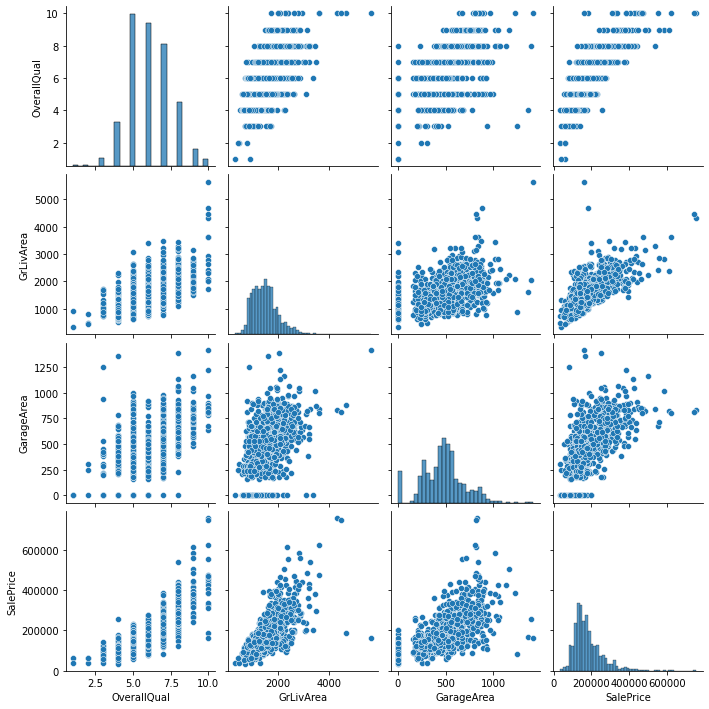

In [6]:
sns.pairplot(train, vars=['OverallQual', 'GrLivArea', 'GarageArea', 'SalePrice'])

In [7]:
# train = train.to_numpy()
y = y.to_numpy()
x = x.to_numpy()
x = x.astype(np.float64, copy=False)
y = y.astype(np.float64, copy=False)

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=4)

In [9]:
#xtrain = np.nan_to_num(xtrain)
#xtest = np.nan_to_num(xtest)

reg = LinearRegression().fit(xtrain, ytrain)
ypred = reg.predict(xtest)
score = reg.score(xtrain, ytrain)
print("R-squared:", score)
mse = mean_squared_error(ytest, ypred)
print("LinearRegression")
print("MSE: ", mse)
print("RMSE: ", mse ** (1 / 2.0))

R-squared: 0.7306040498664288
LinearRegression
MSE:  1102027991.1784117
RMSE:  33196.80694251198


In [10]:
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("SGD Regression", SGDRegressor(n_iter_no_change=50, penalty=None, eta0=0.01, max_iter=100000))
])

In [11]:
# Scale the data and fit the model
pipeline.fit(xtrain, ytrain)

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('SGD Regression',
                 SGDRegressor(max_iter=100000, n_iter_no_change=50,
                              penalty=None))])

In [12]:
#sgdr = SGDRegressor(n_iter_no_change=50, penalty=None, eta0=0.01, max_iter=100000)

print(pipeline)

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('SGD Regression',
                 SGDRegressor(max_iter=100000, n_iter_no_change=50,
                              penalty=None))])


In [13]:
#sgdr.fit(xtrain, ytrain)

score = pipeline.score(xtrain, ytrain)
print("R-squared:", score)

R-squared: 0.7304851877886033


In [15]:
# cv_score = cross_val_score(sgdr, x, y, cv=10)
# print("CV mean score: ", cv_score.mean())

ypred = pipeline.predict(xtest)
mse = mean_squared_error(ytest, ypred)

In [16]:
print("MSE: ", mse)
print("RMSE: ", mse ** (1 / 2.0))

MSE:  1105734629.2488105
RMSE:  33252.58830901454


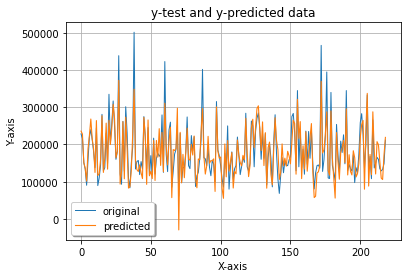

In [17]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()